In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip '/content/drive/MyDrive/SmartBridge/birds.zip'

Archive:  /content/drive/MyDrive/SmartBridge/birds.zip
  inflating: test_data/test_data/blasti/DSC_6396.jpg  
  inflating: test_data/test_data/blasti/DSC_6397.jpg  
  inflating: test_data/test_data/blasti/DSC_6398.jpg  
  inflating: test_data/test_data/blasti/DSC_6399.jpg  
  inflating: test_data/test_data/blasti/DSC_6400.jpg  
  inflating: test_data/test_data/blasti/DSC_6401.jpg  
  inflating: test_data/test_data/blasti/DSC_6402.jpg  
  inflating: test_data/test_data/blasti/DSC_6403.jpg  
  inflating: test_data/test_data/blasti/DSC_6405.jpg  
  inflating: test_data/test_data/blasti/DSC_6406.jpg  
  inflating: test_data/test_data/blasti/DSC_6407.jpg  
  inflating: test_data/test_data/blasti/DSC_6408.jpg  
  inflating: test_data/test_data/blasti/DSC_6409.jpg  
  inflating: test_data/test_data/blasti/DSC_6410.jpg  
  inflating: test_data/test_data/blasti/DSC_6411.jpg  
  inflating: test_data/test_data/bonegl/DSC_4587.jpg  
  inflating: test_data/test_data/bonegl/DSC_4588.jpg  
  inflatin

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [4]:
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=20,zoom_range=0.2,horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)


In [6]:
batch_size = 32

train_generator = train_datagen.flow_from_directory('/content/train_data/train_data',target_size=(224, 224),batch_size=batch_size,class_mode='categorical')

test_generator = test_datagen.flow_from_directory('/content/test_data/test_data',target_size=(224, 224),batch_size=batch_size,class_mode='categorical',shuffle=False)


Found 150 images belonging to 16 classes.
Found 157 images belonging to 16 classes.


In [11]:
train_generator.class_indices

{'blasti': 0,
 'bonegl': 1,
 'brhkyt': 2,
 'cbrtsh': 3,
 'cmnmyn': 4,
 'gretit': 5,
 'hilpig': 6,
 'himbul': 7,
 'himgri': 8,
 'hsparo': 9,
 'indvul': 10,
 'jglowl': 11,
 'lbicrw': 12,
 'mgprob': 13,
 'rebimg': 14,
 'wcrsrt': 15}

In [12]:
test_generator.class_indices

{'blasti': 0,
 'bonegl': 1,
 'brhkyt': 2,
 'cbrtsh': 3,
 'cmnmyn': 4,
 'gretit': 5,
 'hilpig': 6,
 'himbul': 7,
 'himgri': 8,
 'hsparo': 9,
 'indvul': 10,
 'jglowl': 11,
 'lbicrw': 12,
 'mgprob': 13,
 'rebimg': 14,
 'wcrsrt': 15}

In [8]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='softmax'))

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 26, 26, 128)     

In [9]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

model.fit(train_generator,steps_per_epoch=len(train_generator),epochs=10,validation_data=test_generator,validation_steps=len(test_generator))


Epoch 1/10
5/5 [==============================] - 165s 37s/step - loss: 5.1801 - accuracy: 0.0733 - val_loss: 2.7543 - val_accuracy: 0.0573
Epoch 2/10
5/5 [==============================] - 145s 32s/step - loss: 2.7554 - accuracy: 0.0733 - val_loss: 2.7172 - val_accuracy: 0.0764
Epoch 3/10
5/5 [==============================] - 127s 29s/step - loss: 2.7012 - accuracy: 0.1200 - val_loss: 2.6977 - val_accuracy: 0.1720
Epoch 4/10
5/5 [==============================] - 141s 32s/step - loss: 2.5600 - accuracy: 0.1933 - val_loss: 2.7308 - val_accuracy: 0.1338
Epoch 5/10
5/5 [==============================] - 145s 32s/step - loss: 2.4912 - accuracy: 0.1667 - val_loss: 2.6713 - val_accuracy: 0.1592
Epoch 6/10
5/5 [==============================] - 136s 30s/step - loss: 2.4418 - accuracy: 0.2600 - val_loss: 2.8071 - val_accuracy: 0.1465
Epoch 7/10
5/5 [==============================] - 143s 33s/step - loss: 2.3988 - accuracy: 0.1933 - val_loss: 2.7699 - val_accuracy: 0.1720
Epoch 8/10
5/5 [====

In [13]:
model.fit(train_generator,epochs=20,initial_epoch=10,validation_data=test_generator)

Epoch 11/20
5/5 [==============================] - 174s 41s/step - loss: 2.1564 - accuracy: 0.2600 - val_loss: 2.7144 - val_accuracy: 0.2675
Epoch 12/20
5/5 [==============================] - 155s 35s/step - loss: 2.0539 - accuracy: 0.3533 - val_loss: 2.8905 - val_accuracy: 0.2675
Epoch 13/20
5/5 [==============================] - 155s 34s/step - loss: 1.9170 - accuracy: 0.3400 - val_loss: 2.9141 - val_accuracy: 0.2803
Epoch 14/20
5/5 [==============================] - 145s 32s/step - loss: 2.0067 - accuracy: 0.3533 - val_loss: 2.6958 - val_accuracy: 0.2293
Epoch 15/20
5/5 [==============================] - 126s 27s/step - loss: 2.0101 - accuracy: 0.3667 - val_loss: 2.6546 - val_accuracy: 0.2548
Epoch 16/20
5/5 [==============================] - 145s 33s/step - loss: 1.9000 - accuracy: 0.3933 - val_loss: 2.8286 - val_accuracy: 0.2866
Epoch 17/20
5/5 [==============================] - 143s 32s/step - loss: 1.8062 - accuracy: 0.3733 - val_loss: 2.8123 - val_accuracy: 0.2866
Epoch 18/20
5

In [14]:
model.save('birds_trained.h5')

In [17]:
history = model

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns


test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print("Test Accuracy:", test_acc)

predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

class_labels = list(train_generator.class_indices.keys())
predicted_labels = [class_labels[pred_class] for pred_class in predicted_classes]

true_labels = test_generator.classes

5/5 - 65s - loss: 3.0970 - accuracy: 0.2675 - 65s/epoch - 13s/step
Test Accuracy: 0.2675159275531769
5/5 [==============================] - 63s 11s/step


In [22]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory('/content/test_data/test_data',target_size=(224, 224),batch_size=32,class_mode='categorical',shuffle=False)

test_loss, test_accuracy = model.evaluate(test_generator, steps=len(test_generator))
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')


Found 157 images belonging to 16 classes.
5/5 [==============================] - 64s 11s/step - loss: 3.0970 - accuracy: 0.2675
Test Loss: 3.0970
Test Accuracy: 0.2675


In [25]:
import numpy as np
from tensorflow.keras.preprocessing import image

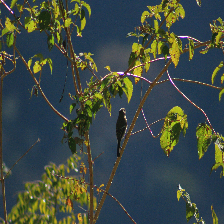

In [41]:
img = image.load_img('/content/test_data/test_data/gretit/11620454726_31a35c26da_o.jpg',target_size=(224,224))
img

In [27]:
# Testing 1

img1 = image.load_img('/content/test_data/test_data/cbrtsh/_D32_10310.jpg',target_size=(224,224))
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred = np.argmax(model.predict(img1))
print(pred)
output = ['blasti', 'bongel', 'brhkyt', 'cbrtsh', 
          'cmnmyn', 'gretit', 'hilpig', 'himbul',
          'himgri', 'hsparo', 'indvul', 'jglowl',
          'lbicrw', 'mgprob', 'rebmig', 'wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 147ms/step
9
hsparo


In [28]:
# Testing 2

img1 = image.load_img('/content/test_data/test_data/hsparo/100_5573.JPG',target_size=(224,224))
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred = np.argmax(model.predict(img1))
print(pred)
output = ['blasti', 'bongel', 'brhkyt', 'cbrtsh', 
          'cmnmyn', 'gretit', 'hilpig', 'himbul',
          'himgri', 'hsparo', 'indvul', 'jglowl',
          'lbicrw', 'mgprob', 'rebmig', 'wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 64ms/step
7
himbul


In [37]:
model = Sequential()
model.add(Conv2D(12,(3,3),activation='relu',input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(24,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(36,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(16,activation='softmax'))

In [38]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 222, 222, 12)      336       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 111, 111, 12)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 109, 109, 24)      2616      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 54, 54, 24)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 52, 52, 36)        7812      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 26, 26, 36)      

In [39]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [40]:
model.fit(train_generator,batch_size=32,validation_data=test_generator,epochs=10)

Epoch 1/10
5/5 [==============================] - 153s 35s/step - loss: 2.8064 - accuracy: 0.0867 - val_loss: 2.7564 - val_accuracy: 0.0573
Epoch 2/10
5/5 [==============================] - 133s 32s/step - loss: 2.7327 - accuracy: 0.1800 - val_loss: 2.7147 - val_accuracy: 0.1720
Epoch 3/10
5/5 [==============================] - 133s 30s/step - loss: 2.6920 - accuracy: 0.1800 - val_loss: 2.6859 - val_accuracy: 0.1401
Epoch 4/10
5/5 [==============================] - 133s 30s/step - loss: 2.6203 - accuracy: 0.1667 - val_loss: 2.6933 - val_accuracy: 0.1656
Epoch 5/10
5/5 [==============================] - 134s 31s/step - loss: 2.5676 - accuracy: 0.1933 - val_loss: 2.6702 - val_accuracy: 0.1656
Epoch 6/10
5/5 [==============================] - 110s 25s/step - loss: 2.4940 - accuracy: 0.2000 - val_loss: 2.6750 - val_accuracy: 0.1656
Epoch 7/10
5/5 [==============================] - 111s 25s/step - loss: 2.4792 - accuracy: 0.2000 - val_loss: 2.6916 - val_accuracy: 0.1911
Epoch 8/10
5/5 [====

In [42]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 222, 222, 12)      336       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 111, 111, 12)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 109, 109, 24)      2616      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 54, 54, 24)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 52, 52, 36)        7812      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 26, 26, 36)      

In [43]:
test_loss, test_accuracy = model.evaluate(test_generator, steps=len(test_generator))
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

5/5 [==============================] - 59s 10s/step - loss: 2.7756 - accuracy: 0.1847
Test Loss: 2.7756
Test Accuracy: 0.1847


In [46]:
img1 = image.load_img('/content/test_data/test_data/rebimg/100_5759.JPG',target_size=(224,224))
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred = np.argmax(model.predict(img1))
print(pred)
output = ['blasti', 'bongel', 'brhkyt', 'cbrtsh', 
          'cmnmyn', 'gretit', 'hilpig', 'himbul',
          'himgri', 'hsparo', 'indvul', 'jglowl',
          'lbicrw', 'mgprob', 'rebmig', 'wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 36ms/step
14
rebmig


In [47]:
# Testing 1

img1 = image.load_img('/content/train_data/train_data/cmnmyn/100_5763.JPG',target_size=(224,224))
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred = np.argmax(model.predict(img1))
print(pred)
output = ['blasti', 'bongel', 'brhkyt', 'cbrtsh', 
          'cmnmyn', 'gretit', 'hilpig', 'himbul',
          'himgri', 'hsparo', 'indvul', 'jglowl',
          'lbicrw', 'mgprob', 'rebmig', 'wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 35ms/step
8
himgri


In [45]:
# Testing 2

img1 = image.load_img('/content/test_data/test_data/hsparo/100_5573.JPG',target_size=(224,224))
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred = np.argmax(model.predict(img1))
print(pred)
output = ['blasti', 'bongel', 'brhkyt', 'cbrtsh', 
          'cmnmyn', 'gretit', 'hilpig', 'himbul',
          'himgri', 'hsparo', 'indvul', 'jglowl',
          'lbicrw', 'mgprob', 'rebmig', 'wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 35ms/step
14
rebmig
